##import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

##import dataset

In [2]:
df = pd.read_csv("titanic_pred.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##**Shape of dataset**

In [3]:
df.shape

(891, 12)

##**columns name**

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##**check nan value**

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##visualize nan value

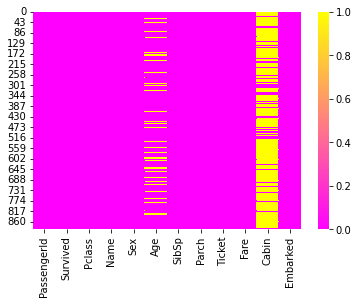

In [7]:
sns.heatmap(df.isnull(), cmap='spring')

##**percentage of nan value**

In [8]:
#PERCENTAGE OF THE MISSING VALUES - DataFrame..... 
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df)[missing_data(df)["Percentage"]!=0].style.background_gradient(cmap='summer')

,Total,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


##**fill nan value**

In [9]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].mean())

##**describe dataset**

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##**categorical value columns**

In [11]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('-'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
--------------------------------------------------------------------------------
Categorical variables column name: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##**drop unused column**

In [13]:
df.drop(columns = ['Cabin','PassengerId','Name','Ticket','Fare'],axis = 1,inplace = True)

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


#**Data Visualization**

##**Age Column**

In [15]:
df[['Age']].describe()

,Age
count,891.000000
mean,29.699118
std,13.002015
min,0.420000
25%,22.000000
50%,29.699118
75%,35.000000
max,80.000000


In [16]:
df.Age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [17]:
df['Age'].value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

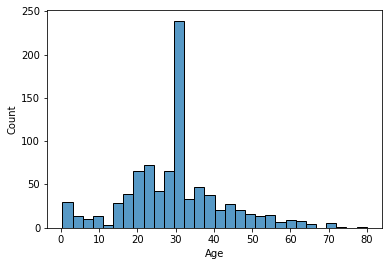

In [18]:
sns.histplot(df.Age)

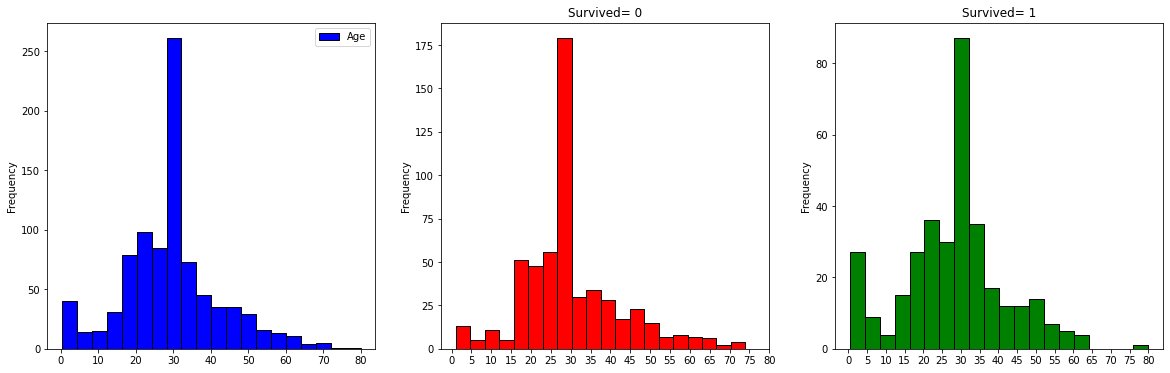

In [19]:
f, ax = plt.subplots(1,3,figsize=(20, 6))
df[['Age']].plot.hist(ax=ax[0],bins=20,edgecolor='black',color='blue')
#df[['Age', 'Survived']].groupby(['Age']).mean().plot.hist(ax=ax[1],bins=20,edgecolor='black',color='red')
df[df['Survived']==0].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='red')
ax[1].set_title('Survived= 0')
ax[1].set_xticks(list(range(0,85,5)))
df[df['Survived']==1].Age.plot.hist(ax=ax[2],color='green',bins=20,edgecolor='black')
ax[2].set_title('Survived= 1')
ax[2].set_xticks(list(range(0,85,5)))

##**Sex Column**

male      577
female    314
Name: Sex, dtype: int64
--------------------------------------------------------------------------------


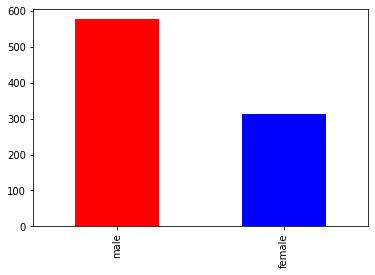

In [20]:
print(df['Sex'].value_counts())
print('-'*80)
df['Sex'].value_counts().plot(kind="bar",color=["red","blue"])

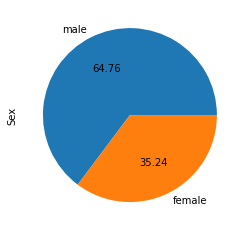

In [21]:
df['Sex'].value_counts().plot(kind="pie", autopct="%.2f")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survival rate')

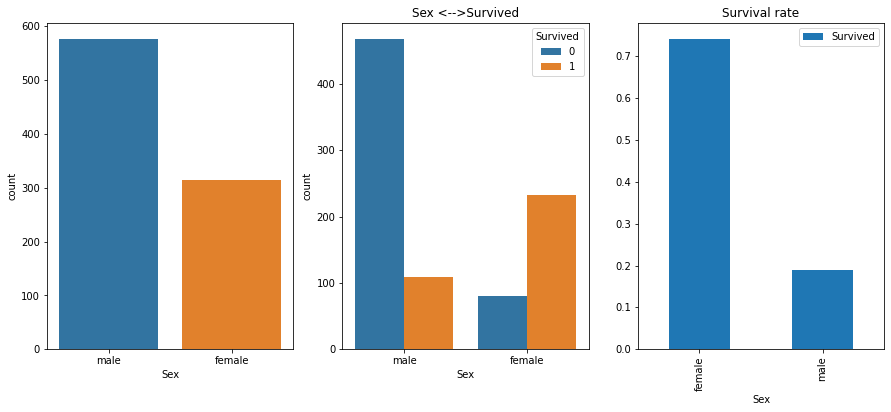

In [22]:
f, ax = plt.subplots(1,3,figsize=(15, 6))
sns.countplot(df.Sex, ax=ax[0])
sns.countplot(df.Sex, hue=df.Survived, ax=ax[1])
ax[1].set_title('Sex <-->Survived')
df[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[2])
ax[2].set_title('Survival rate')

##**Survived Column**

0    549
1    342
Name: Survived, dtype: int64
--------------------------------------------------------------------------------
Survive = 1 & Non Survived = 0



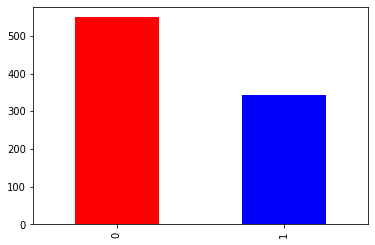

In [23]:
print(df['Survived'].value_counts())
print('-'*80)
df['Survived'].value_counts().plot(kind="bar",color=["red","blue"])
print("Survive = 1 & Non Survived = 0")
print()

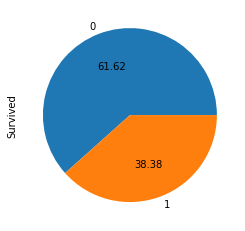

In [24]:
df['Survived'].value_counts().plot(kind="pie", autopct="%.2f")

##**Pclass Column**

3    491
1    216
2    184
Name: Pclass, dtype: int64
--------------------------------------------------------------------------------


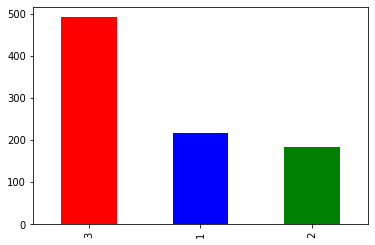

In [25]:
print(df['Pclass'].value_counts())
print('-'*80)
df['Pclass'].value_counts().plot(kind="bar",color=["red","blue","green"])

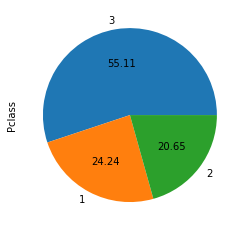

In [26]:
df['Pclass'].value_counts().plot(kind="pie", autopct="%.2f")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survival rate')

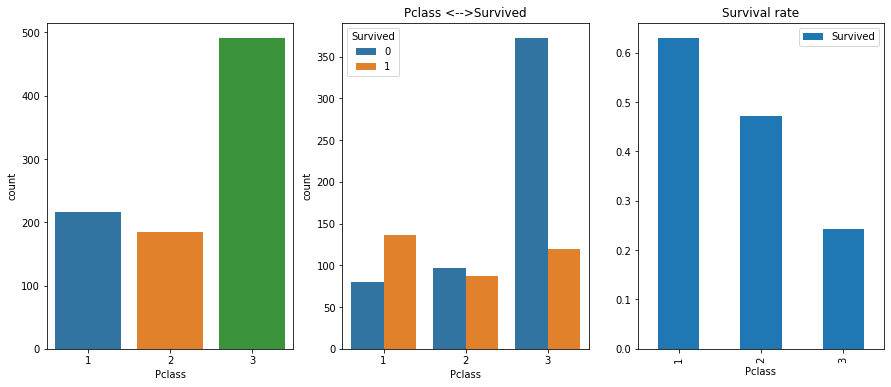

In [27]:
f, ax = plt.subplots(1,3,figsize=(15, 6))
sns.countplot(df.Pclass, ax=ax[0])
sns.countplot(df.Pclass, hue=df.Survived, ax=ax[1])
ax[1].set_title('Pclass <-->Survived')
df[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[2])
ax[2].set_title('Survival rate')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
--------------------------------------------------------------------------------


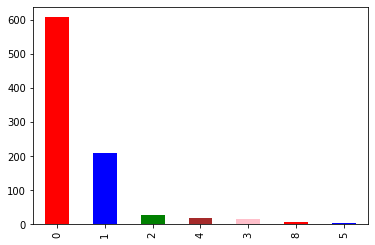

In [28]:
print(df['SibSp'].value_counts())
print('-'*80)
df['SibSp'].value_counts().plot(kind="bar",color=["red","blue","green","brown","pink"])

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
--------------------------------------------------------------------------------


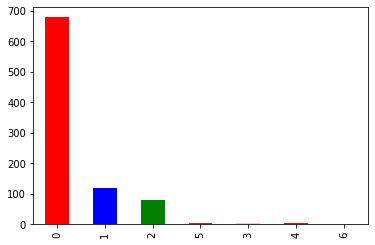

In [29]:
print(df['Parch'].value_counts())
print('-'*80)
df['Parch'].value_counts().plot(kind="bar",color=["red","blue","green","brown","pink"])

##**Embarked Column**

S    646
C    168
Q     77
Name: Embarked, dtype: int64
--------------------------------------------------------------------------------


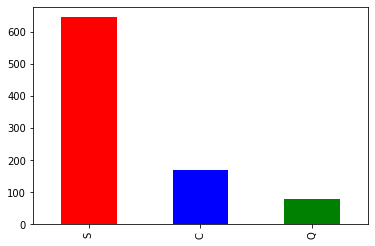

In [30]:
print(df['Embarked'].value_counts())
print('-'*80)
df['Embarked'].value_counts().plot(kind="bar",color=["red","blue","green"])

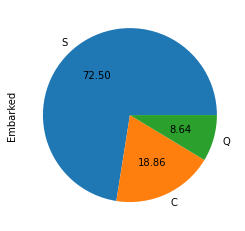

In [31]:
df['Embarked'].value_counts().plot(kind="pie", autopct="%.2f")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Embarked <-->Survived')

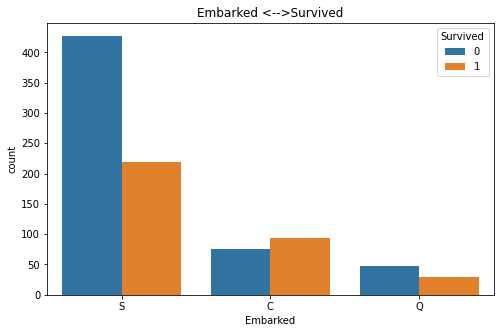

In [32]:
f, ax = plt.subplots(1,1,figsize=(8, 5))
sns.countplot(df.Embarked, hue=df.Survived, ax=ax)
ax.set_title('Embarked <-->Survived')

In [33]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

#**Feature Engineering**

In [34]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [35]:
df['Sex'] = df['Sex'].map({'female':0, 'male':1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [36]:
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,0
1,1,1,0,38.0,1,0,1
2,1,3,0,26.0,0,0,0
3,1,1,0,35.0,1,0,0
4,0,3,1,35.0,0,0,0


##**Dependend and independent variables**

In [37]:
x = df.drop("Survived", axis=1)
y = df["Survived"]

In [38]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,0
1,1,0,38.0,1,0,1
2,3,0,26.0,0,0,0
3,1,0,35.0,1,0,0
4,3,1,35.0,0,0,0


In [39]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

##**train_test_split**

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

##**Model evaluation**

In [41]:
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.metrics import make_scorer, roc_curve, roc_auc_score

#from sklearn.metrics.pairwise import cosine_similarity
#create list of model and accuracy dicts
perform_list = []

def run_model(model_name, est_c, est_pnlty):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    
   


    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    
    
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall    : {recall}')
    print(f'F1-score   : {f1score}')

    # Add performance parameters to list
    perform_list.append(dict([
        ('Model', model_name),
        ('Test Accuracy', round(accuracy, 2)),
        ('Precision', round(precision, 2)),
        ('Recall', round(recall, 2)),
        ('F1', round(f1score, 2))
         ]))

##**MultinomialNB Classifier**

In [42]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 73.99
Precision : 0.7399103139013453
Recall    : 0.7399103139013453
F1-score   : 0.7399103139013452


##**KNeighbors Classifier**

In [43]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 73.99
Precision : 0.7399103139013453
Recall    : 0.7399103139013453
F1-score   : 0.7399103139013452


##**RandomForest Classifier**

In [44]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 78.48
Precision : 0.7847533632286996
Recall    : 0.7847533632286996
F1-score   : 0.7847533632286995


##**DecisionTree Classifier**

In [45]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 76.23
Precision : 0.7623318385650224
Recall    : 0.7623318385650224
F1-score   : 0.7623318385650225


##**Support vector Classifier**

In [46]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 65.92
Precision : 0.6591928251121076
Recall    : 0.6591928251121076
F1-score   : 0.6591928251121076


##**Logistic classifier**

In [47]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 79.37
Precision : 0.7937219730941704
Recall    : 0.7937219730941704
F1-score   : 0.7937219730941703


##**Gaussian Naive Bayes**

In [48]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 78.92
Precision : 0.7892376681614349
Recall    : 0.7892376681614349
F1-score   : 0.7892376681614348


In [49]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Multinomial Naive Bayes,73.99,0.74,0.74,0.74
1,K Nearest Neighbour,73.99,0.74,0.74,0.74
2,Random Forest,78.48,0.78,0.78,0.78
3,Decision Tree Classifier,76.23,0.76,0.76,0.76
4,Support Vector Classifer,65.92,0.66,0.66,0.66
5,Logistic Regression,79.37,0.79,0.79,0.79
6,Gaussian Naive Bayes,78.92,0.79,0.79,0.79


In [50]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value,"from all classifiers")

The best accuracy of model is 79.37 from all classifiers


In [51]:
#for x in model_performance:
  #if max_value == x:
print(max_value)

79.37
